### 1 Use Pandas’ read_csv function directly on this URL to open it as a DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url='http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
df=pd.read_csv(url)

df.head(5)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 2 Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

In [2]:
df=pd.read_csv(url,parse_dates=['time','updated'],index_col=['id'])

df.head(5)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  object             
 13  type       120108 non-null  object             
dtypes: datetime64[ns, UTC](1), d

### 3 Use describe to get the basic statistics of all the columns 

In [5]:
df.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


In [6]:

print('Max Magnitude: '+ str(df['mag'].describe()['max']))
print('Min Magnitude: '+ str(df['mag'].describe()['min']))

Max Magnitude: 8.2
Min Magnitude: -0.97


### 4 Use nlargest to get the top 20 earthquakes by magnitude

In [7]:
df.nlargest(20,'mag')


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223000+00:00,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699000+00:00,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755000+00:00,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398000+00:00,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633000+00:00,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13 19:29:13.018000+00:00,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13 19:35:02.679000+00:00,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13 19:30:39.599000+00:00,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01 02:37:56+00:00,"56km WSW of Panguna, Papua New Guinea",earthquake


In [8]:
a=df['place'].str.split(pat=',',expand=True)
df.insert(1,'countries',a[1],True)

In [9]:
df.head(5)

,time,countries,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,Alaska,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,Nevada,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,Alaska,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,Alaska,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,Mexico,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake


### 6 Display each unique value from the new column

In [10]:
print('Unique countries: '+ str(df.countries.unique()))

Unique countries: [' Alaska' ' Nevada' ' Mexico' ' California' ' Papua New Guinea'
 ' New Zealand' ' Missouri' None ' Montana' ' British Virgin Islands'
 ' Washington' ' Oregon' ' Canada' ' Fiji' ' Antarctica' ' Chile' ' Utah'
 ' Indonesia' ' Solomon Islands' ' Micronesia' ' Oklahoma' ' Hawaii'
 ' Wyoming' ' Russia' ' Arizona' ' Philippines' ' Bolivia' ' Greece'
 ' Japan' ' Puerto Rico' ' Iran' ' Tonga' ' Wallis and Futuna' ' Colorado'
 ' Guam' ' CA' ' Idaho' ' Pakistan' ' Burma' ' China' ' Peru'
 ' Costa Rica' ' East Timor' ' Japan region' ' Northern Mariana Islands'
 ' El Salvador' ' Samoa' ' Taiwan' ' Arkansas' ' South Sandwich Islands'
 ' Colombia' ' Dominican Republic' ' Argentina' ' Texas' ' New Hampshire'
 ' Saint Helena' ' Tanzania' ' Vanuatu' ' Bosnia and Herzegovina' ' India'
 ' American Samoa' ' Tennessee' ' Kentucky' ' Serbia' ' Nicaragua'
 ' Republic of the Congo' ' U.S. Virgin Islands' ' ' ' Guatemala'
 ' Kyrgyzstan' ' Afghanistan' ' New Caledonia' ' Saudi Arabia' ' Nunoa

### 7 Create a filtered dataset that only has earthquakes of magnitude 4 or larger 

In [11]:
df4=df[df['mag']>=4]

In [12]:
df4

,time,countries,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,Papua New Guinea,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08 01:43:19+00:00,"115km ESE of Taron, Papua New Guinea",earthquake
usc000mqln,2014-01-31 22:54:32.970,New Zealand,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08 01:43:19+00:00,"120km N of Raoul Island, New Zealand",earthquake
usc000mqls,2014-01-31 22:49:49.740,None,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08 01:43:19+00:00,South of the Fiji Islands,earthquake
usc000mf1x,2014-01-31 22:19:44.330,Alaska,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08 01:43:19+00:00,"72km E of Amatignak Island, Alaska",earthquake
usc000mqlm,2014-01-31 21:56:44.320,Papua New Guinea,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08 01:43:19+00:00,"100km ESE of Taron, Papua New Guinea",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,Northern Mariana Islands,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24 00:35:14.040000+00:00,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake
usc000t6y2,2014-12-01 01:50:23.380,Indonesia,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24 00:35:14.040000+00:00,"57km SSW of Cibungur, Indonesia",earthquake
usc000t6y1,2014-12-01 01:04:17.890,Philippines,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24 00:35:14.040000+00:00,"37km ESE of Santiago, Philippines",earthquake


### 8 Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

Text(0.5, 1.0, 'Top 5 Countries with Earthquakes Mag > 4')

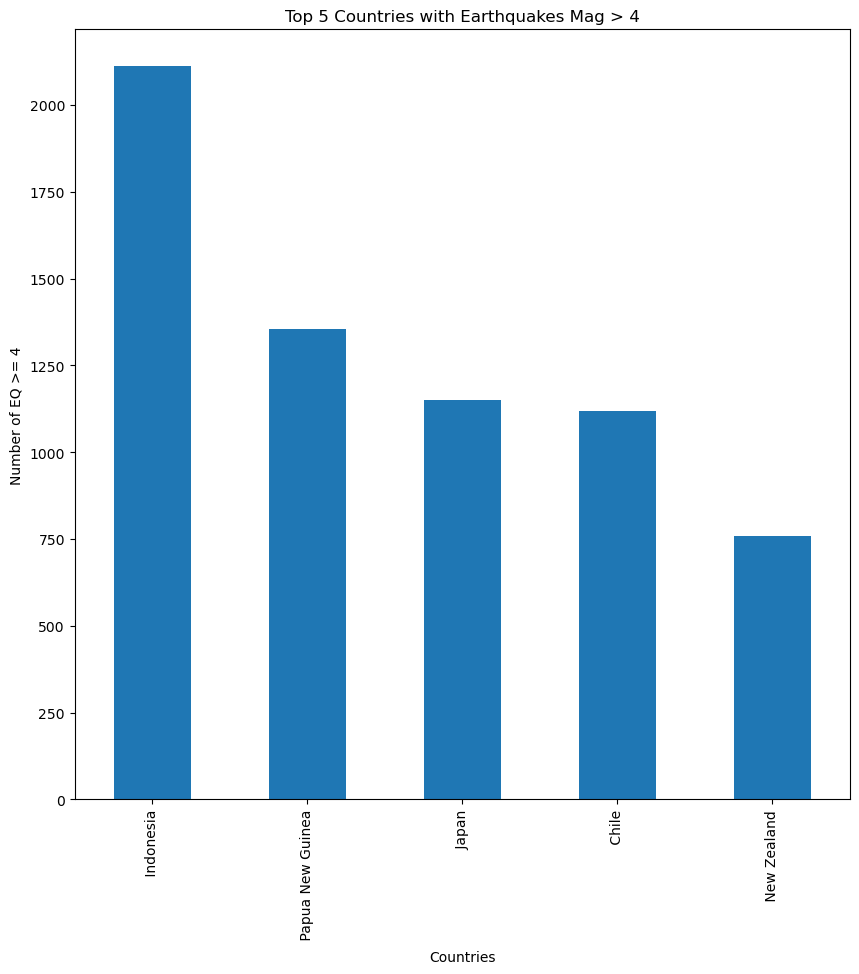

In [18]:
countcountries=df4['countries'].value_counts()
top5=countcountries.head(5)


plt.figure(figsize=(10,10))
top5.plot(kind='bar')
plt.ylabel('Number of EQ >= 4')
plt.xlabel('Countries')
plt.title('Top 5 Countries with Earthquakes Mag > 4')

### 9) Make a histogram the distribution of the Earthquake magnitudes

## Do one subplot for the filtered and one for the unfiltered dataset. Use a Logarithmic scale. What sort of relationship do you see?

Text(0, 0.5, 'Frequency')

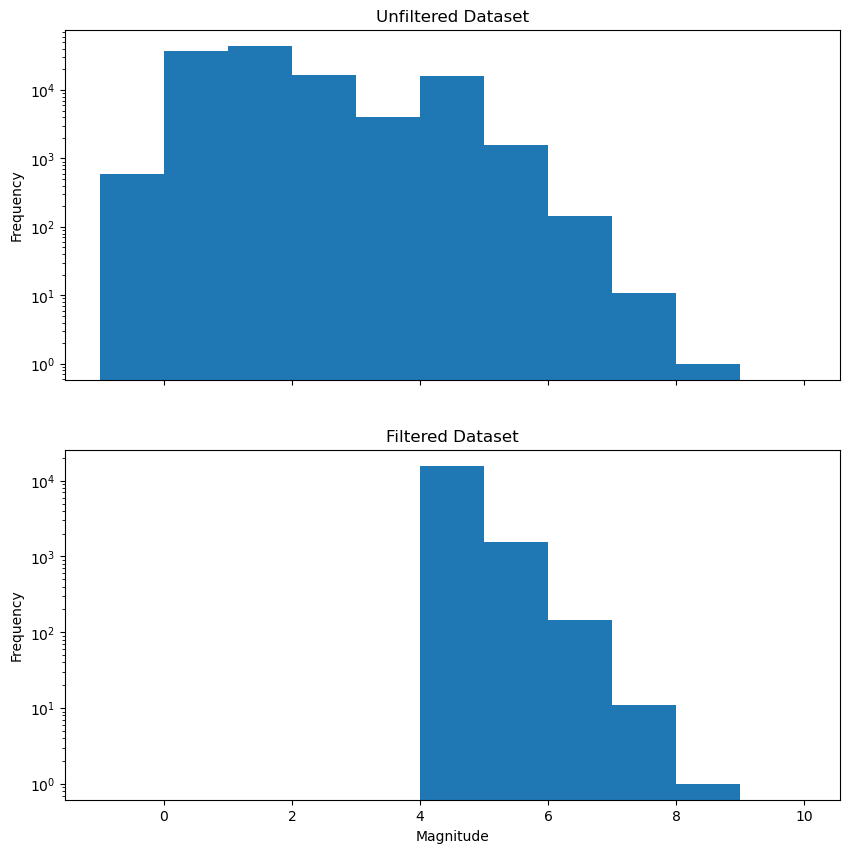

In [35]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(10,10),sharex=True)
ax1.hist(df['mag'],bins=[-1,0,1,2,3,4,5,6,7,8,9,10])
ax1.set_yscale('log')
ax2.hist(df4['mag'],bins=[-1,0,1,2,3,4,5,6,7,8,9,10])
ax2.set_yscale('log')
ax1.set_title('Unfiltered Dataset')
ax2.set_title('Filtered Dataset')
ax2.set_xlabel('Magnitude')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')


The relationship between occurence of earthquakes with a particular magnitude follows a parabolic curve with peaks in magnitude 1-2 earthquakes. There are lower number of higher magnitude earthquakes and lower magnitude earthquakes. As magnitude to energy of an earthquake is logarithmic it agrees with the distribution we see. The low counts in the lower magnitude could be due to a poor detection by instruments.

### 10) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude
Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

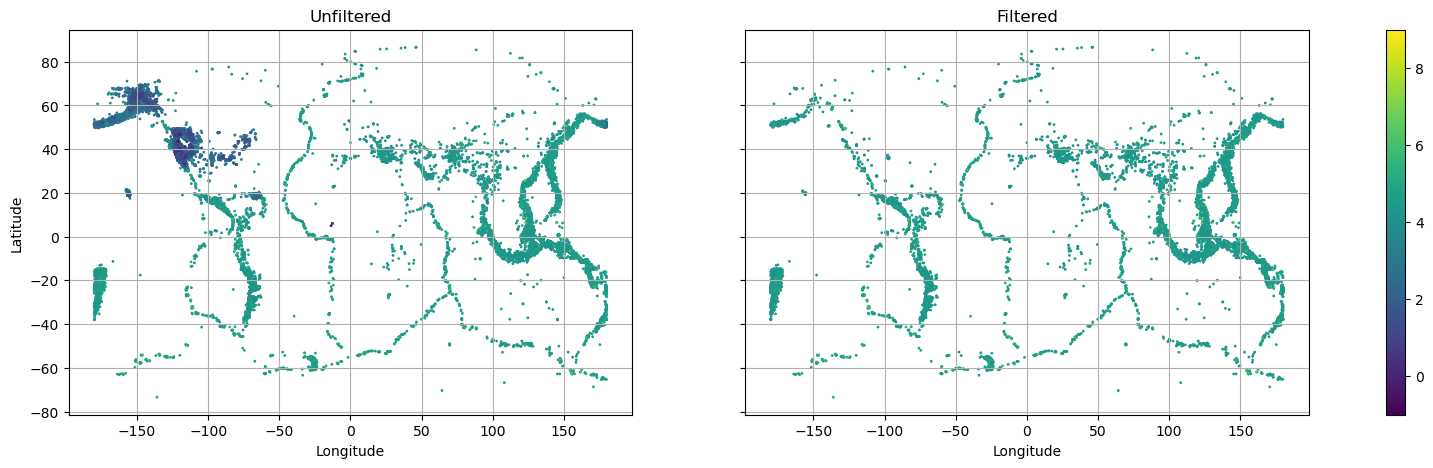

In [81]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5),sharey=True)
ax1.grid()
ax2.grid()
ax1.set_xlabel('Longitude')
ax2.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

ax1.set_title('Unfiltered')
ax2.set_title('Filtered')

s1=ax1.scatter(df['longitude'],df['latitude'],c=df['mag'],vmin=-1,vmax=9,s=1)
s2=ax2.scatter(df4['longitude'],df4['latitude'],c=df4['mag'],vmin=-1,vmax=9,s=1)
fig.colorbar(s2,ax=(ax1,ax2))

Between the two figures, there is a significant number of small earthquakes Mag <4 that can be found around the US which is not seen in other parts of the world.